In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings  as ws
ws.filterwarnings("ignore")

In [12]:
dataset= pd.read_csv("energydata_complete.csv")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [57]:
dataset.tail()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,430,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [58]:
dataset.sample(10)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
3320,460,21.890000,44.530000,20.926667,43.333333,22.920556,43.655000,21.500000,40.230000,18.890000,...,18.39,43.230000,5.366667,762.833333,80.000000,4.000000,40.000000,2.100000,31.536423,31.536423
1685,120,17.100000,43.663333,16.200000,43.790000,17.600000,41.663333,15.190000,43.000000,15.487778,...,15.10,43.090000,5.933333,768.983333,99.166667,3.166667,35.000000,5.850000,43.404776,43.404776
1783,30,18.500000,42.200000,17.790000,41.590000,18.290000,43.663333,15.830000,46.900000,15.390000,...,15.30,47.500000,5.316667,769.016667,92.000000,4.000000,23.000000,4.116667,17.395296,17.395296
18384,50,23.290000,42.526667,22.974000,42.238000,24.390000,38.590000,23.166667,40.090000,21.390000,...,22.64,42.236000,13.100000,752.500000,77.000000,4.000000,26.000000,9.200000,27.590411,27.590411
3185,140,22.133333,49.063333,21.823333,45.230000,22.100000,46.760000,21.400000,46.266667,20.653889,...,18.20,46.663333,6.766667,757.766667,81.333333,6.000000,30.833333,3.733333,22.632074,22.632074
15565,150,21.200000,33.700000,19.730000,32.000000,23.826667,37.933333,20.426667,31.533333,19.200000,...,18.79,29.166667,9.683333,756.200000,41.333333,4.666667,40.000000,-2.983333,26.055569,26.055569
14527,40,22.760000,34.556667,23.323333,31.323333,22.963333,35.833333,22.956000,33.054000,20.340000,...,20.29,37.290000,17.333333,761.233333,40.000000,5.000000,40.000000,3.600000,25.909521,25.909521
9759,690,20.890000,36.760000,18.290000,39.590000,21.200000,36.226667,19.600000,34.400000,18.290000,...,19.50,37.826667,5.750000,762.750000,76.000000,3.500000,44.000000,1.750000,36.322244,36.322244
11913,60,21.100000,44.000000,23.356667,39.656667,21.790000,40.500000,20.823333,42.900000,19.290000,...,20.00,42.400000,14.750000,752.450000,79.000000,4.500000,34.500000,11.150000,34.340247,34.340247
12267,50,23.000000,41.966667,20.500000,44.900000,24.600000,38.200000,21.390000,41.730000,21.200000,...,20.73,38.730000,9.300000,753.500000,78.000000,3.000000,40.000000,5.650000,17.242694,17.242694


In [8]:
dataset.describe(include="all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [15]:
#Dropping `date` and `light` columns
dataset.drop(['date','lights'],axis=1,inplace=True)

In [60]:
dataset.shape

(19735, 27)


Insight: We have 19735 rows and 27 columns 

In [16]:
dataset.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
#Now let’s see the columns that are available in our dataset.
dataset.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [61]:
dataset.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There are no missing values

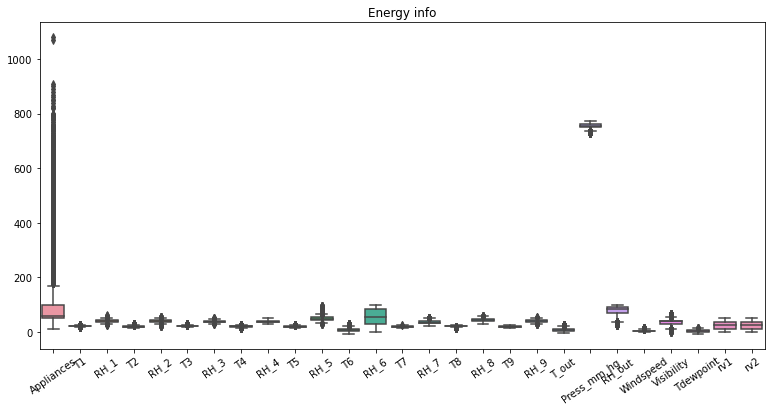

In [67]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Energy info")
plt.show()

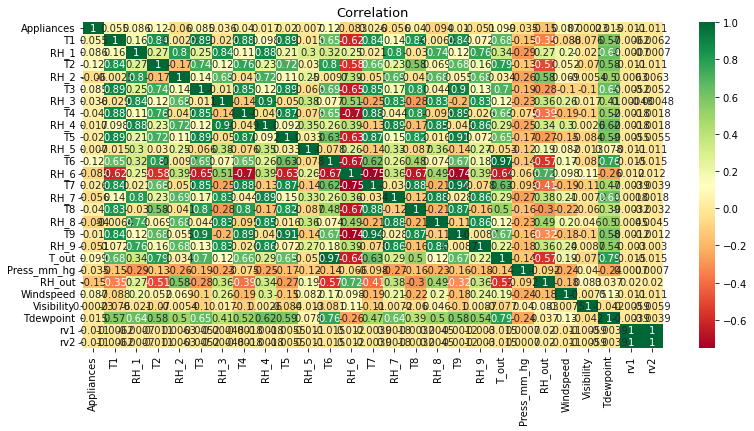

In [69]:
plt.figure(figsize=(13,6))
sns.heatmap(dataset.corr(),
            annot=True,
            cmap='RdYlGn')
        
plt.title("Correlation" , size=13)
plt.show()

In [21]:
#Feature Scalling using MinMax
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(dataset)
train_feat = pd.DataFrame(train_scaled, columns=dataset.columns)

In [22]:
#X and y
X1 = train_feat[['T2']]
y1 = train_feat['T6']

Q:
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [23]:
#Model Training
lr = LinearRegression()
lr.fit(X1,y1)
#Print Model Score
print(f'Model R2_Score: {round(lr.score(X1,y1),2)}')

Model R2_Score: 0.64


In [24]:
#Select Train and test features
X = train_feat.drop('Appliances', axis=1)
y = train_feat['Appliances']

In [35]:
#Splitting Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Shape of Training Set is {X_train.shape}')
print(f'Shape of Testing Set is {X_test.shape}')

Shape of Training Set is (13814, 26)
Shape of Testing Set is (5921, 26)


In [37]:
#Model Training
lr.fit(X_train,y_train)

#Predicting for Test set
y_pred = lr.predict(X_test)

In [43]:
#What is the Mean Absolute Error (in two decimal places)?

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)

print(f'Testing ---- Mean Absolute Error MAE {round(MAE,2)}')

Testing ---- Mean Absolute Error MAE 0.05


In [44]:
#What is the Residual Sum of Squares (in two decimal places)?

RSS = np.sum(np.square(y_test - y_pred))
print(f'Testing ---- Residual Sum of Squares {round(RSS,2)}')

Testing ---- Residual Sum of Squares 45.35


In [70]:
#What is the Root Mean Squared Error (in three decimal places)?

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Testing ---- Root Mean Squarred Error RMSE {round(RMSE,3)}')

Testing ---- Root Mean Squarred Error RMSE 0.088


In [71]:
#What is the Coefficient of Determination (in two decimal places)?

from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print(f'Testing ---- R-Squarred {round(R2,2)}')

Testing ---- R-Squarred 0.15


In [50]:
#Which features have the lowest and highest weights respectively?

coefficients_d = pd.DataFrame(zip(X.columns, lr.coef_),
            columns=['features','coefficients']).sort_values('coefficients')
print(coefficients_d)

       features  coefficients
3          RH_2     -0.456698
18        T_out     -0.321860
2            T2     -0.236178
16           T9     -0.189941
15         RH_8     -0.157595
20       RH_out     -0.077671
13         RH_7     -0.044614
17         RH_9     -0.039800
8            T5     -0.015657
0            T1     -0.003281
24          rv1      0.000770
25          rv2      0.000770
19  Press_mm_hg      0.006839
12           T7      0.010319
22   Visibility      0.012307
9          RH_5      0.016006
7          RH_4      0.026386
6            T4      0.028981
21    Windspeed      0.029183
11         RH_6      0.038049
5          RH_3      0.096048
14           T8      0.101995
23    Tdewpoint      0.117758
10           T6      0.236425
4            T3      0.290627
1          RH_1      0.553547


In [52]:
print (coefficients_d.min())

print (coefficients_d.max())

features        Press_mm_hg
coefficients      -0.456698
dtype: object
features             rv2
coefficients    0.553547
dtype: object


In [54]:
from sklearn.linear_model import Lasso
#LASSO (L1)
ls = Lasso(alpha=0.001)
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [55]:
#. How many of the features have non-zero feature weights?
#getting the coefficients

len(ls.coef_[ls.coef_ !=0])

4

In [56]:
#What is the new RMSE with the lasso regression?
#calculating for the RMSE

LASSO_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_ls))
print(f'LASSO RMSE {round(LASSO_RMSE,3)}')

LASSO RMSE 0.094
